In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager #updated
import requests
import numpy as np
import pandas as pd
import csv
from datetime import datetime, timedelta
import time
import calendar 

import urllib.request
import os

In [4]:
import urllib.request
class AppURLopener(urllib.request.FancyURLopener):
    version = "Mozilla/5.0"

#opener = AppURLopener()
#response = opener.open('http://httpbin.org/user-agent')

In [11]:
pdf_path = ""

def download_file(download_url, filename, comp_name):
    try:
        response = urllib.request.urlopen(download_url) 
    except:
       
        opener = AppURLopener()
        response = opener.open(download_url)
    file = open(comp_name + '/' + filename + ".pdf", 'wb')
    file.write(response.read())
    file.close()

def get_links_onpage(driver):
    links = []
    elems = driver.find_elements_by_xpath("//a[@href]")
    for elem in elems:
        lin = elem.get_attribute("href")
        links.append(lin)
    return links

In [117]:
os.listdir('coty')

['coty_sustainability_report_fy20.pdf#pa.pdf',
 '20_12_10_assurance_report_voluntary_verification_coty_final.pdf',
 '.ipynb_checkpoints',
 'coty_modern_slavery_statement_2019.pdf']

In [8]:
##at&t need to visit about site

def get_sustainability_report(company_name):
    
    #creating new directory for the company
    current_directory = os.getcwd()
    final_directory = os.path.join(current_directory, company_name)
    if not os.path.exists(final_directory):
       os.makedirs(final_directory)
    
    #Taking input from user 
    search_string = company_name.replace('&', '')
    comp_name = search_string

    # This is done to structure the string  
    # into search url.(This can be ignored) 
    search_string = search_string + " sustainability report"
    search_string = search_string.replace(' ', '+')

    # Assigning the browser variable with chromedriver of Chrome. 
    # Any other browser and its respective webdriver  
    # like geckodriver for Mozilla Firefox can be used 
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    browser = webdriver.Chrome(ChromeDriverManager().install(), options = chrome_options)

    for i in range(1): 
        matched_elements = browser.get("https://www.google.com/search?q=" + search_string + "&start=" + str(i)) 

    links_fst = get_links_onpage(browser)
    
    google_website_visited = 0
    ##entering the google website
    while google_website_visited < 1:
        for lin in links_fst:
            pdf_exist = 0
            google_website_visited += 1
            download_count = 0
            if "google" in lin:
                continue
            elif (comp_name + ".com" in lin and 'sustainability' in lin.split('/')[-2]) or\
            (comp_name + ".com" in lin and 'responsibilities' in lin.split('/')[-2]) or\
            ('our' in lin and 'sustainability' in lin.split('/')[-2]) or\
            (comp_name + ".com" in lin and 'sustainable' in lin.split('/')[-2]) or \
            (comp_name + ".com" in lin and 'sustainability' in lin.split('/')[-1]) or\
            (comp_name + ".com" in lin and 'csr' in lin.split('/')[-2]): #last one for at&t
                browser.get(lin)
                time.sleep(2)
                ##entering the companies website
                links_snd = get_links_onpage(browser)
                for lin in links_snd:
                    if 'pdf' in lin:
                        #print(lin)
                        pdf_exist = 1
                        cur_file = os.listdir(company_name)
                        if lin.split('/')[-1][:-4] + '.pdf' not in cur_file:
                            try:
                                download_file(lin, lin.split('/')[-1][:-4], company_name)
                                download_count += 1
                            except:
                                continue
                        else:
                            continue
                if download_count > 0 or pdf_exist == 1:
                    browser.quit()
                    break
                else:
                    for lin in links_snd:
                        if 'report' in lin:
                            #print(lin)
                            browser.get(lin)
                            links_trd = get_links_onpage(browser)
                            for lin in links_trd:
                                if 'pdf' in lin:
                                    cur_file = os.listdir(company_name)
                                    if lin.split('/')[-1][:-4] + '.pdf' not in cur_file:
                                        try:
                                            download_file(lin, lin.split('/')[-1][:-4], company_name)
                                            download_count += 1
                                        except:
                                            continue
                                    else:
                                        continue
                            if download_count > 0 or pdf_exist == 1:
                                browser.quit()
                                break
                break
        break
    
    if download_count == 0:
        browser.quit()
        print('no new report found for the company :( !')


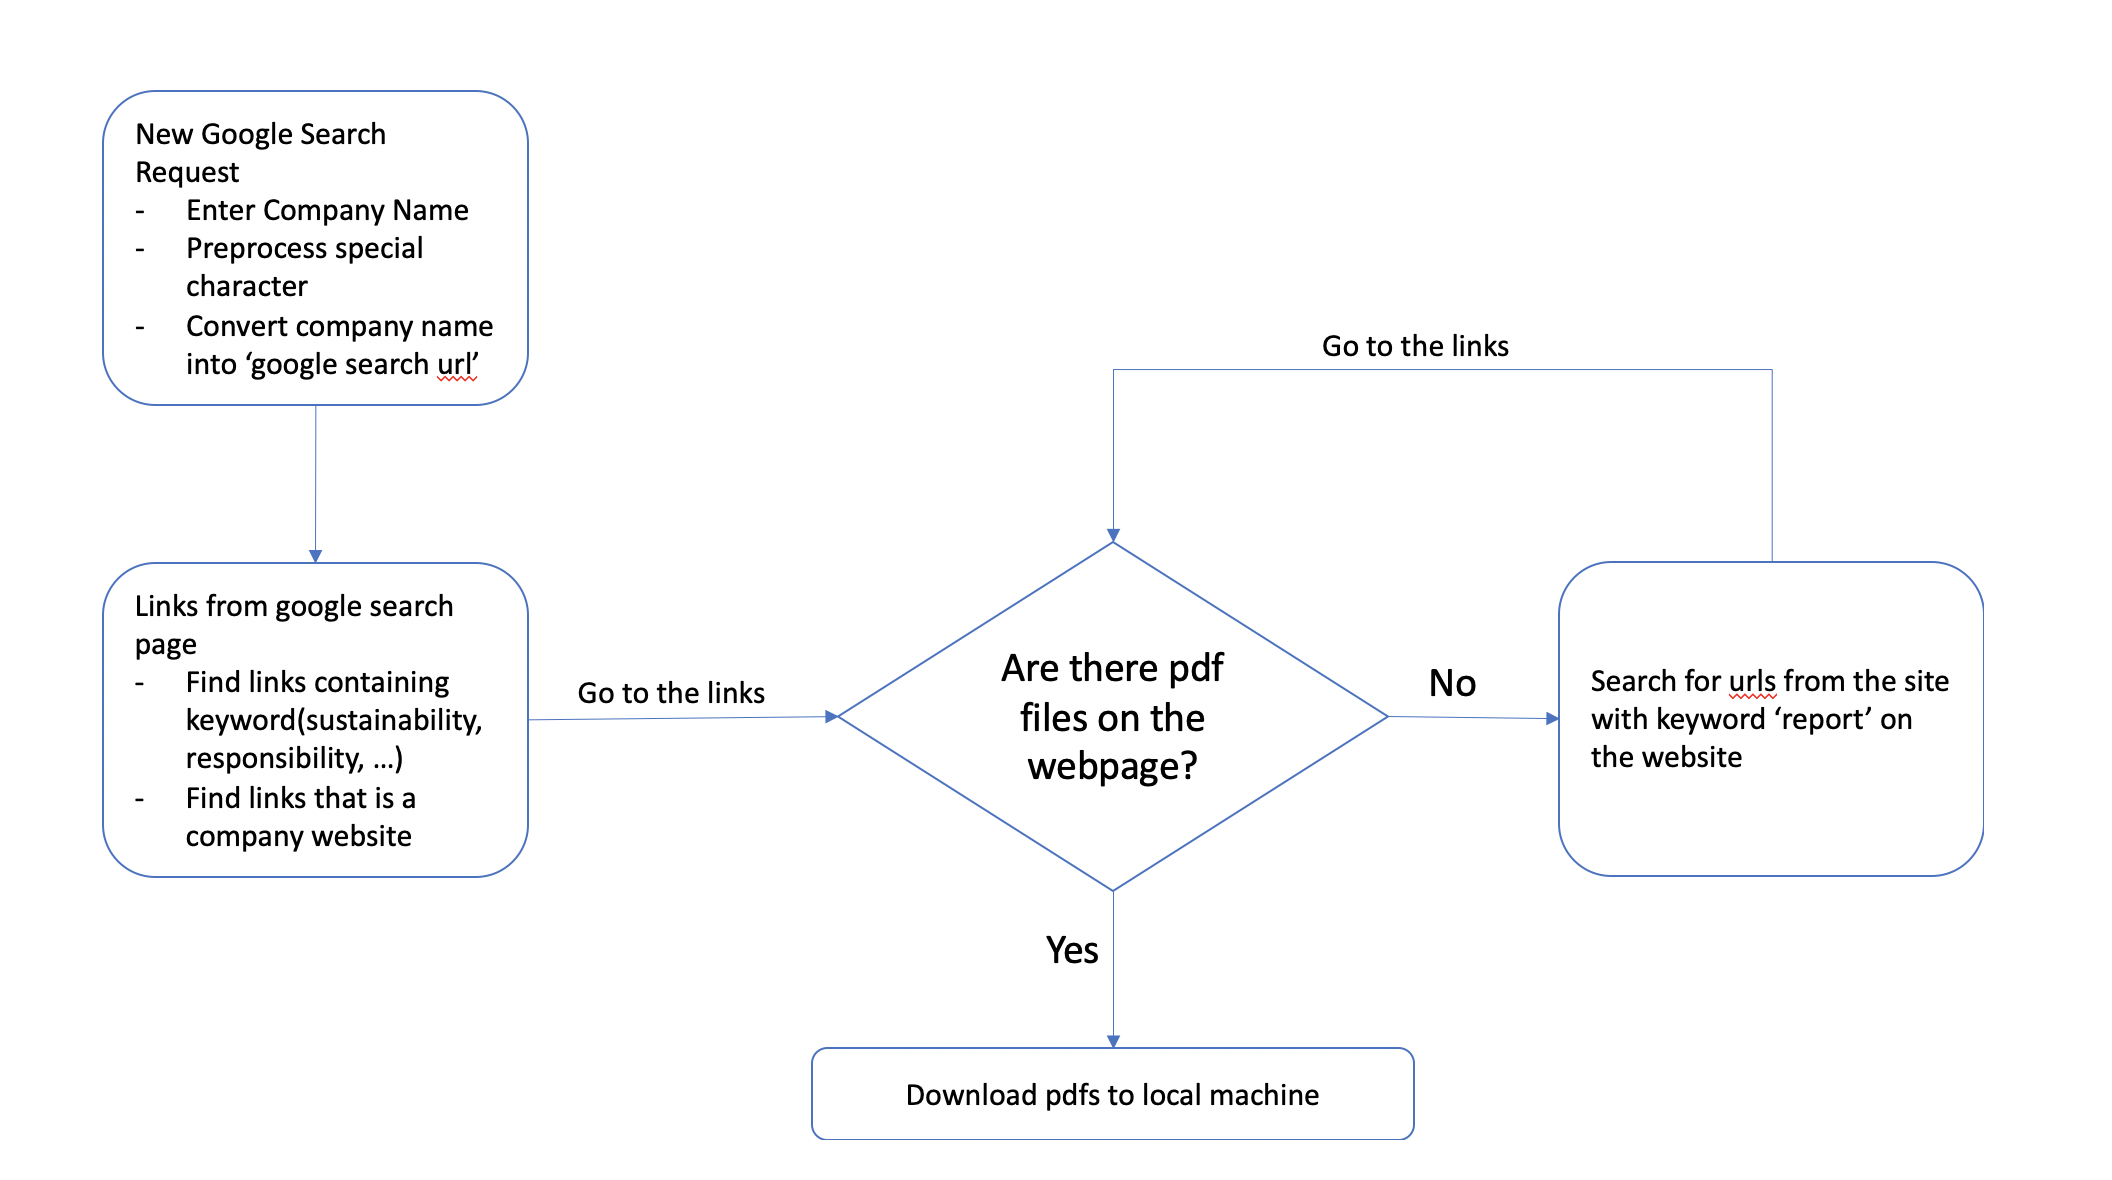

In [14]:
from IPython.display import Image
Image(filename='pdf_downloader_logic.png',width=1000, height=800)

The code can
1. Input a company name
2. Create a new folder for the company if the company does not have a folder under the desired category
3. Search for sustainability/company social responsibility related pdf files
4. Download finded pdf files into local machine into the company folder
5. Update any pdf files from the web if it is not included in the current company folder

In [23]:
get_sustainability_report('estee lauder')

[WDM] - Current google-chrome version is 88.0.4324
[WDM] - Get LATEST driver version for 88.0.4324
[WDM] - Driver [/Users/hequanhong/.wdm/drivers/chromedriver/mac64/88.0.4324.96/chromedriver] found in cache


In [20]:
get_sustainability_report('t-mobile')

[WDM] - Current google-chrome version is 88.0.4324
[WDM] - Get LATEST driver version for 88.0.4324
[WDM] - Driver [/Users/hequanhong/.wdm/drivers/chromedriver/mac64/88.0.4324.96/chromedriver] found in cache


In [75]:
browser = webdriver.Chrome(ChromeDriverManager().install())
browser.get('https://www.loreal.com/en/commitments-and-responsibilities/')

[WDM] - Current google-chrome version is 88.0.4324
[WDM] - Get LATEST driver version for 88.0.4324
[WDM] - Driver [/Users/hequanhong/.wdm/drivers/chromedriver/mac64/88.0.4324.96/chromedriver] found in cache


In [86]:
'https://www.loreal.com/en/commitments-and-responsibilities/'.split('/')

['https:', '', 'www.loreal.com', 'en', 'commitments-and-responsibilities', '']

In [84]:
links = []
elems = browser.find_elements_by_xpath("//a[@href]")
for elem in elems:
    lin = elem.get_attribute("href")
    links.append(lin)

In [85]:
for lin in links:
    if 'report' in lin:
        print('1', lin)
    elif 'pdf' in lin:
        print('2', lin)

2 https://www.loreal.com/-/media/project/loreal/brand-sites/corp/master/lcorp/documents-media/publications/l4f/loreal-for-the-future--booklet.pdf
1 https://www.loreal.com/-/media/project/loreal/brand-sites/corp/master/lcorp/documents-media/publications/sbwa/2019-progress-report.pdf


In [23]:
for lin in links:
    if 'pdf' in lin:
        print(lin)

https://media.elcompanies.com/files/e/estee-lauder-companies/universal/our-commitments/2020-cs-report/elc-fy20-citizenship-sustainability-report.pdf
https://media.elcompanies.com/files/e/estee-lauder-companies/universal/our-commitments/2020-cs-report/elc-cdp-climate-change-questionnaire-2020.pdf
https://media.elcompanies.com/files/e/estee-lauder-companies/universal/our-commitments/2020-cs-report/elc-cdp-climate-change-questionnaire-2020.pdf
https://media.elcompanies.com/files/e/estee-lauder-companies/universal/our-commitments/2020-cs-report/elc-cdp-water-questionnaire-2020.pdf
https://media.elcompanies.com/files/e/estee-lauder-companies/universal/our-commitments/2020-cs-report/elc-cdp-water-questionnaire-2020.pdf
https://media.elcompanies.com/files/e/estee-lauder-companies/universal/our-commitments/2020-cs-report/elc-cdp-forest-questionnaire-2020.pdf
https://media.elcompanies.com/files/e/estee-lauder-companies/universal/our-commitments/2020-cs-report/elc-cdp-forest-questionnaire-2020.p